In [52]:
import ROOT
import matplotlib.pyplot as plt

In [53]:
ROOT.gStyle.SetOptStat(0)

In [54]:
hfile = ROOT.TFile.Open("histograms.root")

h_pp = ROOT.TH2D("PassPass","PassPass",23,40,201,23,40,201)
h_pf = ROOT.TH2D("PassFail","PassFail",23,40,201,23,40,201)
h_fp = ROOT.TH2D("FailPass","FailPass",23,40,201,23,40,201)
h_ff = ROOT.TH2D("FailFail","FailFail",23,40,201,23,40,201)
h_tot = ROOT.TH2D("Total","Total",23,40,201,23,40,201)

h_pp.GetXaxis().SetTitle("Jet 1 m_{sd} [GeV]")
h_pf.GetXaxis().SetTitle("Jet 1 m_{sd} [GeV]")
h_fp.GetXaxis().SetTitle("Jet 1 m_{sd} [GeV]")
h_ff.GetXaxis().SetTitle("Jet 1 m_{sd} [GeV]")
h_tot.GetXaxis().SetTitle("Jet 1 m_{sd} [GeV]")

h_pp.GetYaxis().SetTitle("Jet 2 m_{sd} [GeV]")
h_pf.GetYaxis().SetTitle("Jet 2 m_{sd} [GeV]")
h_fp.GetYaxis().SetTitle("Jet 2 m_{sd} [GeV]")
h_ff.GetYaxis().SetTitle("Jet 2 m_{sd} [GeV]")
h_tot.GetYaxis().SetTitle("Jet 2 m_{sd} [GeV]")

In [55]:
msd2_slices = [i*7+40 for i in range(0,23)]

for i,b in enumerate(msd2_slices[:-1]):
    h_pp_1d = hfile.Get("QCD_pp_m2_"+str(i))
    h_pf_1d = hfile.Get("QCD_pf_m2_"+str(i))
    h_fp_1d = hfile.Get("QCD_fp_m2_"+str(i))
    h_ff_1d = hfile.Get("QCD_ff_m2_"+str(i))
    for j in range(1,h_pp_1d.GetNbinsX()+1):
        h_pp.SetBinContent(j,i+1,h_pp_1d.GetBinContent(j))
        h_pf.SetBinContent(j,i+1,h_pf_1d.GetBinContent(j))
        h_fp.SetBinContent(j,i+1,h_fp_1d.GetBinContent(j))
        h_ff.SetBinContent(j,i+1,h_ff_1d.GetBinContent(j))
        
h_tot.Add(h_pp)
h_tot.Add(h_pf)
h_tot.Add(h_fp)
h_tot.Add(h_ff)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


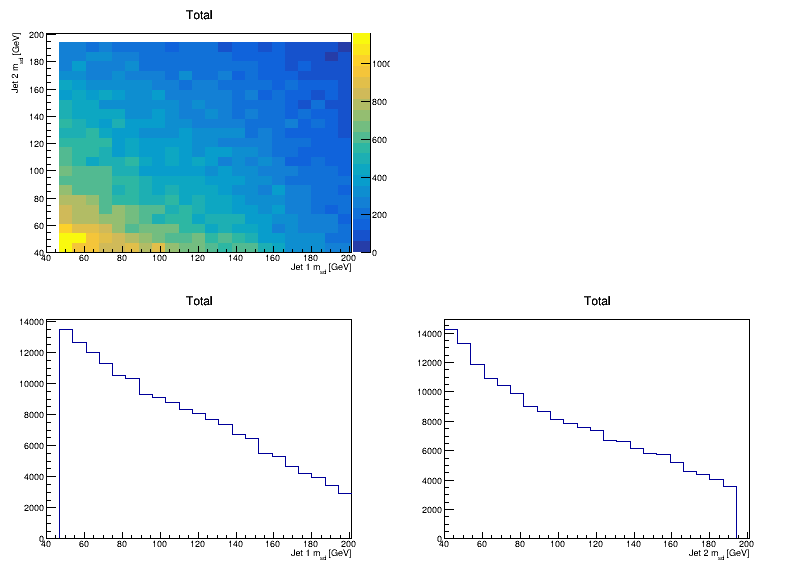

In [56]:
c = ROOT.TCanvas("c","c",800,600)
c.Divide(2,2)
c.Draw()

c.cd(1)
h_tot.Draw("COLZ")
c.cd(3)
h_tot.ProjectionX().Draw()
c.cd(4)
h_tot.ProjectionY().Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


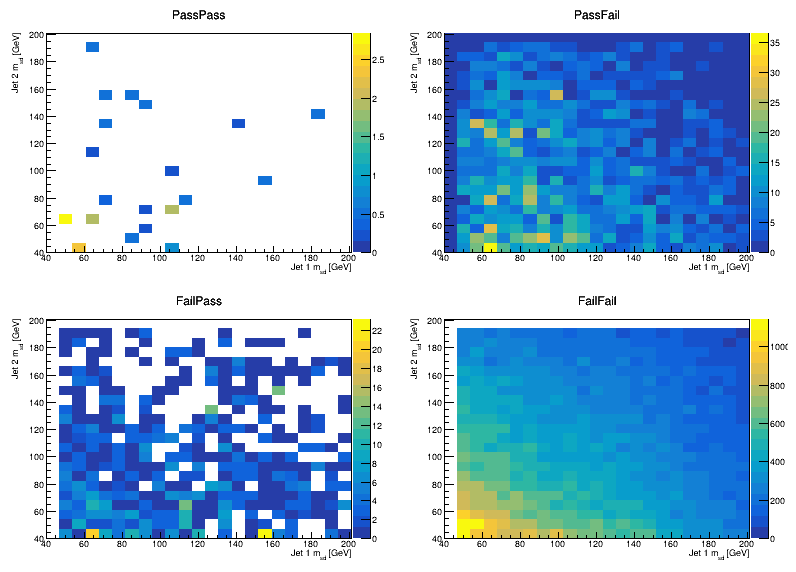

In [57]:
c = ROOT.TCanvas("c","c",800,600)
c.Divide(2,2)
c.Draw()

c.cd(1)
h_pp.Draw("COLZ")
c.cd(2)
h_pf.Draw("COLZ")
c.cd(3)
h_fp.Draw("COLZ")
c.cd(4)
h_ff.Draw("COLZ")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


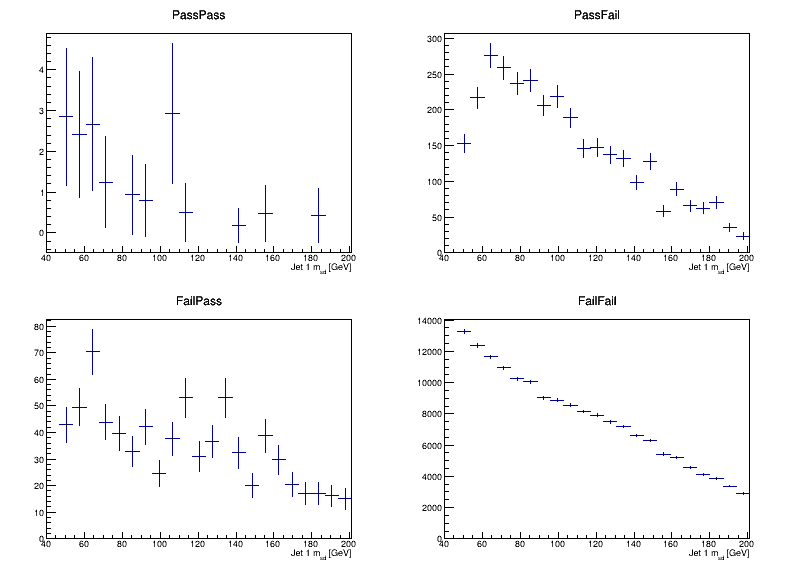

In [58]:
c = ROOT.TCanvas("c","c",800,600)
c.Divide(2,2)
c.Draw()

c.cd(1)
h_pp.ProjectionX().Draw("pe")
c.cd(2)
h_pf.ProjectionX().Draw("pe")
c.cd(3)
h_fp.ProjectionX().Draw("pe")
c.cd(4)
h_ff.ProjectionX().Draw("pe")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


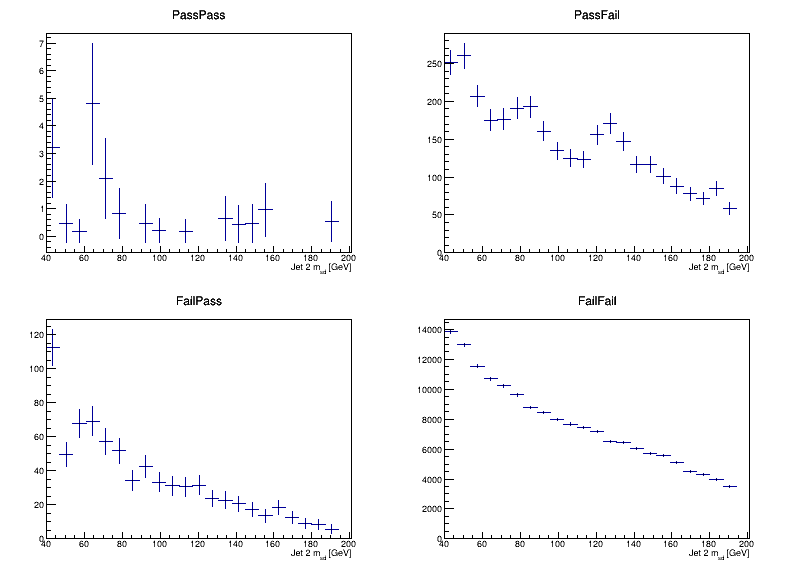

In [59]:
c = ROOT.TCanvas("c","c",800,600)
c.Divide(2,2)
c.Draw()

c.cd(1)
h_pp.ProjectionY().Draw("pe")
c.cd(2)
h_pf.ProjectionY().Draw("pe")
c.cd(3)
h_fp.ProjectionY().Draw("pe")
c.cd(4)
h_ff.ProjectionY().Draw("pe")

In [60]:
textsize1=.04
textsize2=.07

leg = ROOT.TLegend(0.65,0.65,0.85,0.85)
leg.SetBorderSize(0)
    
h_pp.SetLineColor(1)
h_pp.SetMarkerStyle(20)
h_pp.SetMarkerColor(1)
h_pp.Scale(1.0/h_pass.Integral())
h_pp.GetXaxis().SetTitle("Jet 1 m_{sd} [GeV]")
h_pp.GetXaxis().SetTitleSize(0)
h_pp.GetXaxis().SetLabelSize(0)
h_pp.GetYaxis().SetTitleSize(textsize1)
h_pp.GetYaxis().SetLabelSize(textsize1)
#h_pass.GetYaxis().SetTitle("p_{T} bin "+str(i_pt))
leg.AddEntry(h_pass,"QCD MC PP","p")

    
    #h_rat = h_pass.Clone("QCD_ratio_pt"+str(i_pt))
    #h_rat.Divide(h_fail)
    #h_rat.GetXaxis().SetTitleSize(textsize2)
    #h_rat.GetXaxis().SetLabelSize(textsize2)
    #h_rat.GetYaxis().SetTitle("P/F ratio")
    #h_rat.GetYaxis().SetTitleOffset(0.5)
    #h_rat.GetYaxis().SetTitleSize(textsize2)
    #h_rat.GetYaxis().SetLabelSize(textsize2)
    
    #maxi = h_pass.GetMaximum()
    #if h_fail.GetMaximum() > maxi:
    #    maxi = h_fail.GetMaximum()
    #h_pass.GetYaxis().SetRangeUser(0,1.1*maxi)
    #h_rat.GetYaxis().SetRangeUser(0,1.2*h_rat.GetMaximum())

c = ROOT.TCanvas("c_"+str(i_pt),"c"+str(i_pt),600,600)
c.Draw()
    
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.4, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.Draw()  
pad1.cd()      

h_pp.Draw("pe")
#    h_fail.Draw("histsame")
leg.Draw()
    
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.4)
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2)
pad2.Draw()
pad2.cd()  
ROOT.gStyle.SetOptTitle(0)
    
#h_rat.Draw("pe")

c.SaveAs("plot-all/pp.png")

NameError: name 'h_pass' is not defined